### Análise de Cancelamento de Clientes(Churn) em empresas

O churn é um dos indicadores mais críticos para qualquer negócio que depende de relacionamentos recorrentes com clientes – como fintechs, telecom, SaaS, e-commerce, bancos e serviços de assinatura. Ele representa a perda de clientes em um determinado período, e tem impacto direto no crescimento sustentável da empresa.


Por que o Churn é tão relevante?

- Custo de aquisição vs. retenção: conquistar um novo cliente pode custar até 5x mais do que manter um já existente.

- Receita previsível: em modelos de assinatura, cada cancelamento compromete previsões de faturamento.

- Concorrência acirrada: mercados saturados fazem com que a perda de clientes se torne uma ameaça ainda maior.

- Indicador de saúde do negócio: altas taxas de churn revelam problemas estruturais em produto, atendimento ou estratégia comercial.

Machine Learning aplicado ao Churn é uma das aplicações mais estratégicas em Data Science, principalmente em negócios baseados em assinaturas, serviços financeiros, telecom, SaaS, varejo e e-commerce. A ideia é usar dados históricos de clientes para identificar padrões que indicam maior risco de cancelamento ou abandono e, assim, agir antes que o churn aconteça.

Modelos de ML permitem que a empresa antecipe quais clientes estão em risco de cancelamento, oferecendo:

- Predição: probabilidade de um cliente cancelar no próximo mês/trimestre.

- Segmentação inteligente: identificação de perfis de risco com base em comportamento, histórico de uso e perfil demográfico.

- Ações direcionadas: campanhas de retenção personalizadas, descontos estratégicos ou melhorias no atendimento.


Valor estratégico do modelo de Churn

Um modelo bem construído não é apenas uma ferramenta técnica, mas um ativo de negócio. Ele permite:

- Reduzir perdas financeiras com cancelamentos antecipados.

- Criar planos de retenção personalizados, com maior ROI em campanhas.

- Transformar dados em vantagem competitiva, prevendo movimentos antes da concorrência.

Combinar a análise do churn com Machine Learning é uma forma poderosa de transformar risco em oportunidade. O cancelamento deixa de ser apenas uma estatística negativa e passa a ser um motor de inteligência estratégica, capaz de orientar ações proativas e impulsionar a rentabilidade.

No final deste notebook, trabalhamos com dois experimentos, onde o primeiro experimento  trata de uma análise feita a partir do teste A/B e o segundo experimento traz os insghits do modelo preditivo utilizado neste projeto.

### Dados utilizados:

- `ID`:
    - Descrição: Identificador único para cada cliente.
- `Tipo de empresa`:
    - Descrição: Categoria da empresa, como MEI, ME, EPP, etc.
- `Fundação da empresa`:
    - Descrição: Ano de fundação da empresa.
- `Possui mais de um sócio`:
    - Descrição: Indica se a empresa possui mais de um sócio (Sim/Não).
- `Funcionários`:
    - Descrição: Número de funcionários na empresa.
- `Meses de permanência` :
    - Descrição: Quantidade de meses que o cliente permaneceu ativo.
- `Utiliza serviços financeiros`:
    - Descrição: Indica se a empresa utiliza serviços financeiros (Sim/Não).
- `PossuiContador`:
    - Descrição: Indica se a empresa possui contador (Sim/Não).
- `Faz conciliação bancária`:
    - Descrição: Indica se a empresa realiza conciliação bancária (Sim/Não).
- `Frequência de utilização de feature do sistema: Módulo financeiro`:
    - Descrição: Frequência de utilização do módulo financeiro do sistema.
- `Frequência de utilização de feature do sistema: Emissão de nota fiscal`:
    - Descrição: Frequência de utilização da emissão de nota fiscal no sistema.
- `Frequência de utilização de feature do sistema: Integração bancária`:
    - Descrição: Frequência de utilização da integração bancária no sistema.
- `Frequência de utilização de feature do sistema: Módulo de vendas`:
    - Descrição: Frequência de utilização do módulo de vendas no sistema.
- `Frequência de utilização de feature do sistema: Relatórios`:
    - Descrição: Frequência de utilização de relatórios no sistema.
- `Frequência de utilização de feature do sistema: Utilização de APIs de integração`:
    - Descrição: Frequência de utilização de APIs de integração no sistema.
- `Contrato`:
    - Descrição: Tipo de contrato com o cliente.
- `Emite boletos`:
    - Descrição: Indica se a empresa emite boletos (Sim/Não).
- `Tipo de pagamento`:
    - Descrição: Método de pagamento utilizado pelo cliente.
- `Receita mensal`:
    - Descrição: Receita mensal gerada pelo cliente.
- `Receita total`:
    - Descrição: Receita total gerada pelo cliente.
- `Churn`:
    - Descrição: Indica se houve churn (cancelamento) do cliente (Sim/Não).


In [5]:
# Bibliotecas principais
import math
import pandas as pd
import numpy as np
import re, unicodedata
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from xgboost import XGBClassifier
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu
from sklearn.dummy import DummyClassifier
from statsmodels.stats.proportion import proportions_ztest
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay

from sklearn.metrics import (
    roc_curve, auc, RocCurveDisplay,
    precision_recall_curve, average_precision_score,
    PrecisionRecallDisplay
)

from sklearn.utils.class_weight import compute_sample_weight

In [6]:
df = pd.read_excel("C:\\Projetos\\Churn_Prediction\\customer_churn_data.xlsx")
df.head()

,ID,Tipo de empresa,Fundação da empresa,Possui mais de um sócio,Funcionários,Meses de permanência,Utiliza serviços financeiros,PossuiContador,Faz conciliação bancária,Frequência de utilização de feature do sistema: Módulo financeiro,...,Frequência de utilização de feature do sistema: Módulo de vendas,Frequência de utilização de feature do sistema: Relatórios,Frequência de utilização de feature do sistema: Utilização de APIs de integração,Contrato,Emite boletos,Emite boletos.1,Tipo de pagamento,Receita mensal,Receita total,Churn
0,1,Micro empresa,2016,Sim,até 5 funcionários,1,Não,NaN,automática,Pouco uso,...,Pouco uso,Pouco uso,Pouco uso,Mês-a-mês,1,Yes,Boleto - pagamento único,29.85,29.85,Não
1,2,Pequena empresa,2018,Não,até 5 funcionários,34,Sim,Não,automática,Uso frequente,...,Pouco uso,Pouco uso,Pouco uso,Trimestral,0,No,Boleto - mês a mês,56.95,1889.50,Não
2,3,Pequena empresa,2021,Não,até 5 funcionários,2,Sim,Não,automática,Uso frequente,...,Pouco uso,Pouco uso,Pouco uso,Mês-a-mês,1,Yes,Boleto - mês a mês,53.85,108.15,Sim
3,4,Pequena empresa,2016,Não,até 5 funcionários,45,Não,NaN,automática,Uso frequente,...,Uso frequente,Pouco uso,Pouco uso,Trimestral,0,No,Cartão de crédito - pagamento único,42.30,1840.75,Não
4,5,Micro empresa,2017,Não,até 5 funcionários,2,Sim,Não,manual,Pouco uso,...,Pouco uso,Pouco uso,Pouco uso,Mês-a-mês,1,Yes,Boleto - pagamento único,70.70,151.65,Sim


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   ID                                                                                7043 non-null   int64  
 1   Tipo de empresa                                                                   7043 non-null   object 
 2   Fundação da empresa                                                               7043 non-null   int64  
 3   Possui mais de um sócio                                                           7043 non-null   object 
 4   Funcionários                                                                      7043 non-null   object 
 5   Meses de permanência                                                              7043 non-null   int64  
 6   

In [8]:
df.describe()

,ID,Fundação da empresa,Meses de permanência,Emite boletos,Receita mensal,Receita total
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000
mean,3522.000000,2016.736476,32.371149,0.592219,64.761692,2283.300441
std,2033.283305,4.582311,24.559481,0.491457,30.090047,2266.771362
min,1.000000,2001.000000,0.000000,0.000000,18.250000,18.800000
25%,1761.500000,2016.000000,9.000000,0.000000,35.500000,401.450000
50%,3522.000000,2018.000000,29.000000,1.000000,70.350000,1397.475000
75%,5282.500000,2020.000000,55.000000,1.000000,89.850000,3794.737500
max,7043.000000,2021.000000,72.000000,1.000000,118.750000,8684.800000


In [9]:
df.isnull().sum()

ID                                                                                    0
Tipo de empresa                                                                       0
Fundação da empresa                                                                   0
Possui mais de um sócio                                                               0
Funcionários                                                                          0
Meses de permanência                                                                  0
Utiliza serviços financeiros                                                          0
PossuiContador                                                                      682
Faz conciliação bancária                                                              0
Frequência de utilização de feature do sistema: Módulo financeiro                     0
Frequência de utilização de feature do sistema: Emissão de nota fiscal                0
Frequência de utilização de feat

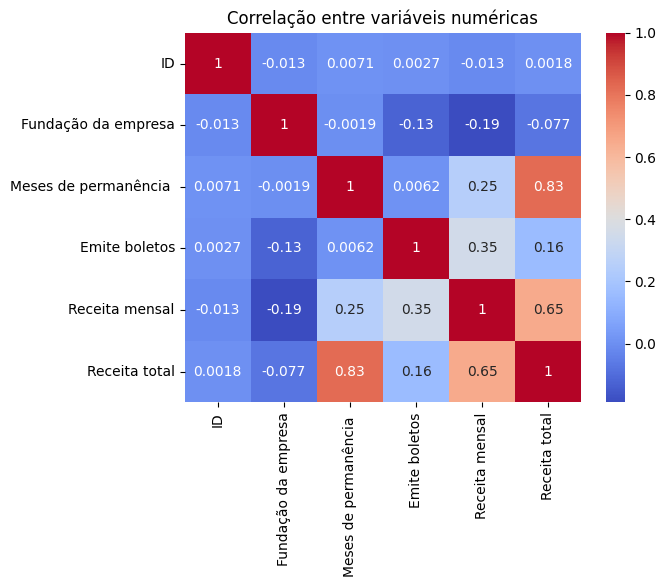

In [10]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlação entre variáveis numéricas")
plt.show()

- Meses de permanência × Receita total: forte correlação positiva (0,83) → quanto mais tempo o cliente permanece, maior a receita acumulada.

- Receita mensal × Receita total: correlação alta (0,65) → clientes com maior ticket mensal também acumulam mais receita.

- Receita mensal × Emite boletos: correlação moderada (0,35) → emissão de boletos tende a estar associada a maiores valores mensais.

- Fundação da empresa tem correlação fraca ou negativa com as demais variáveis → pouco impacto direto nas métricas financeiras.

### Analise univariada

In [11]:
display(df["Churn"].value_counts())
display(df["Churn"].value_counts(normalize=True).map("{:.2%}".format))

Churn
Não    5174
Sim    1869
Name: count, dtype: int64

Churn
Não    73.46%
Sim    26.54%
Name: proportion, dtype: object

C:\Users\josie\AppData\Local\Temp\ipykernel_3844\3948055947.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Churn", data=df, palette="Blues_r")


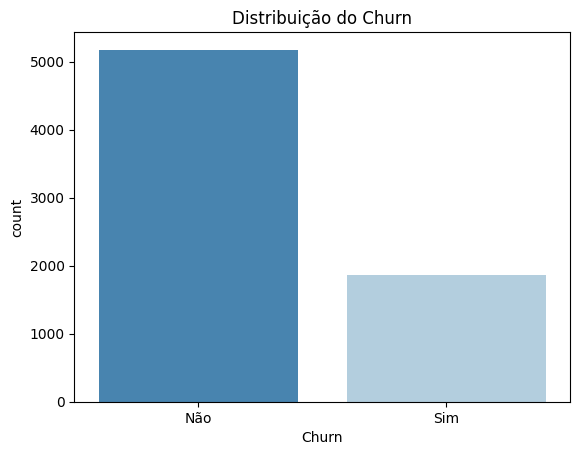

In [12]:
sns.countplot(x="Churn", data=df, palette="Blues_r")
plt.title("Distribuição do Churn")
plt.show()

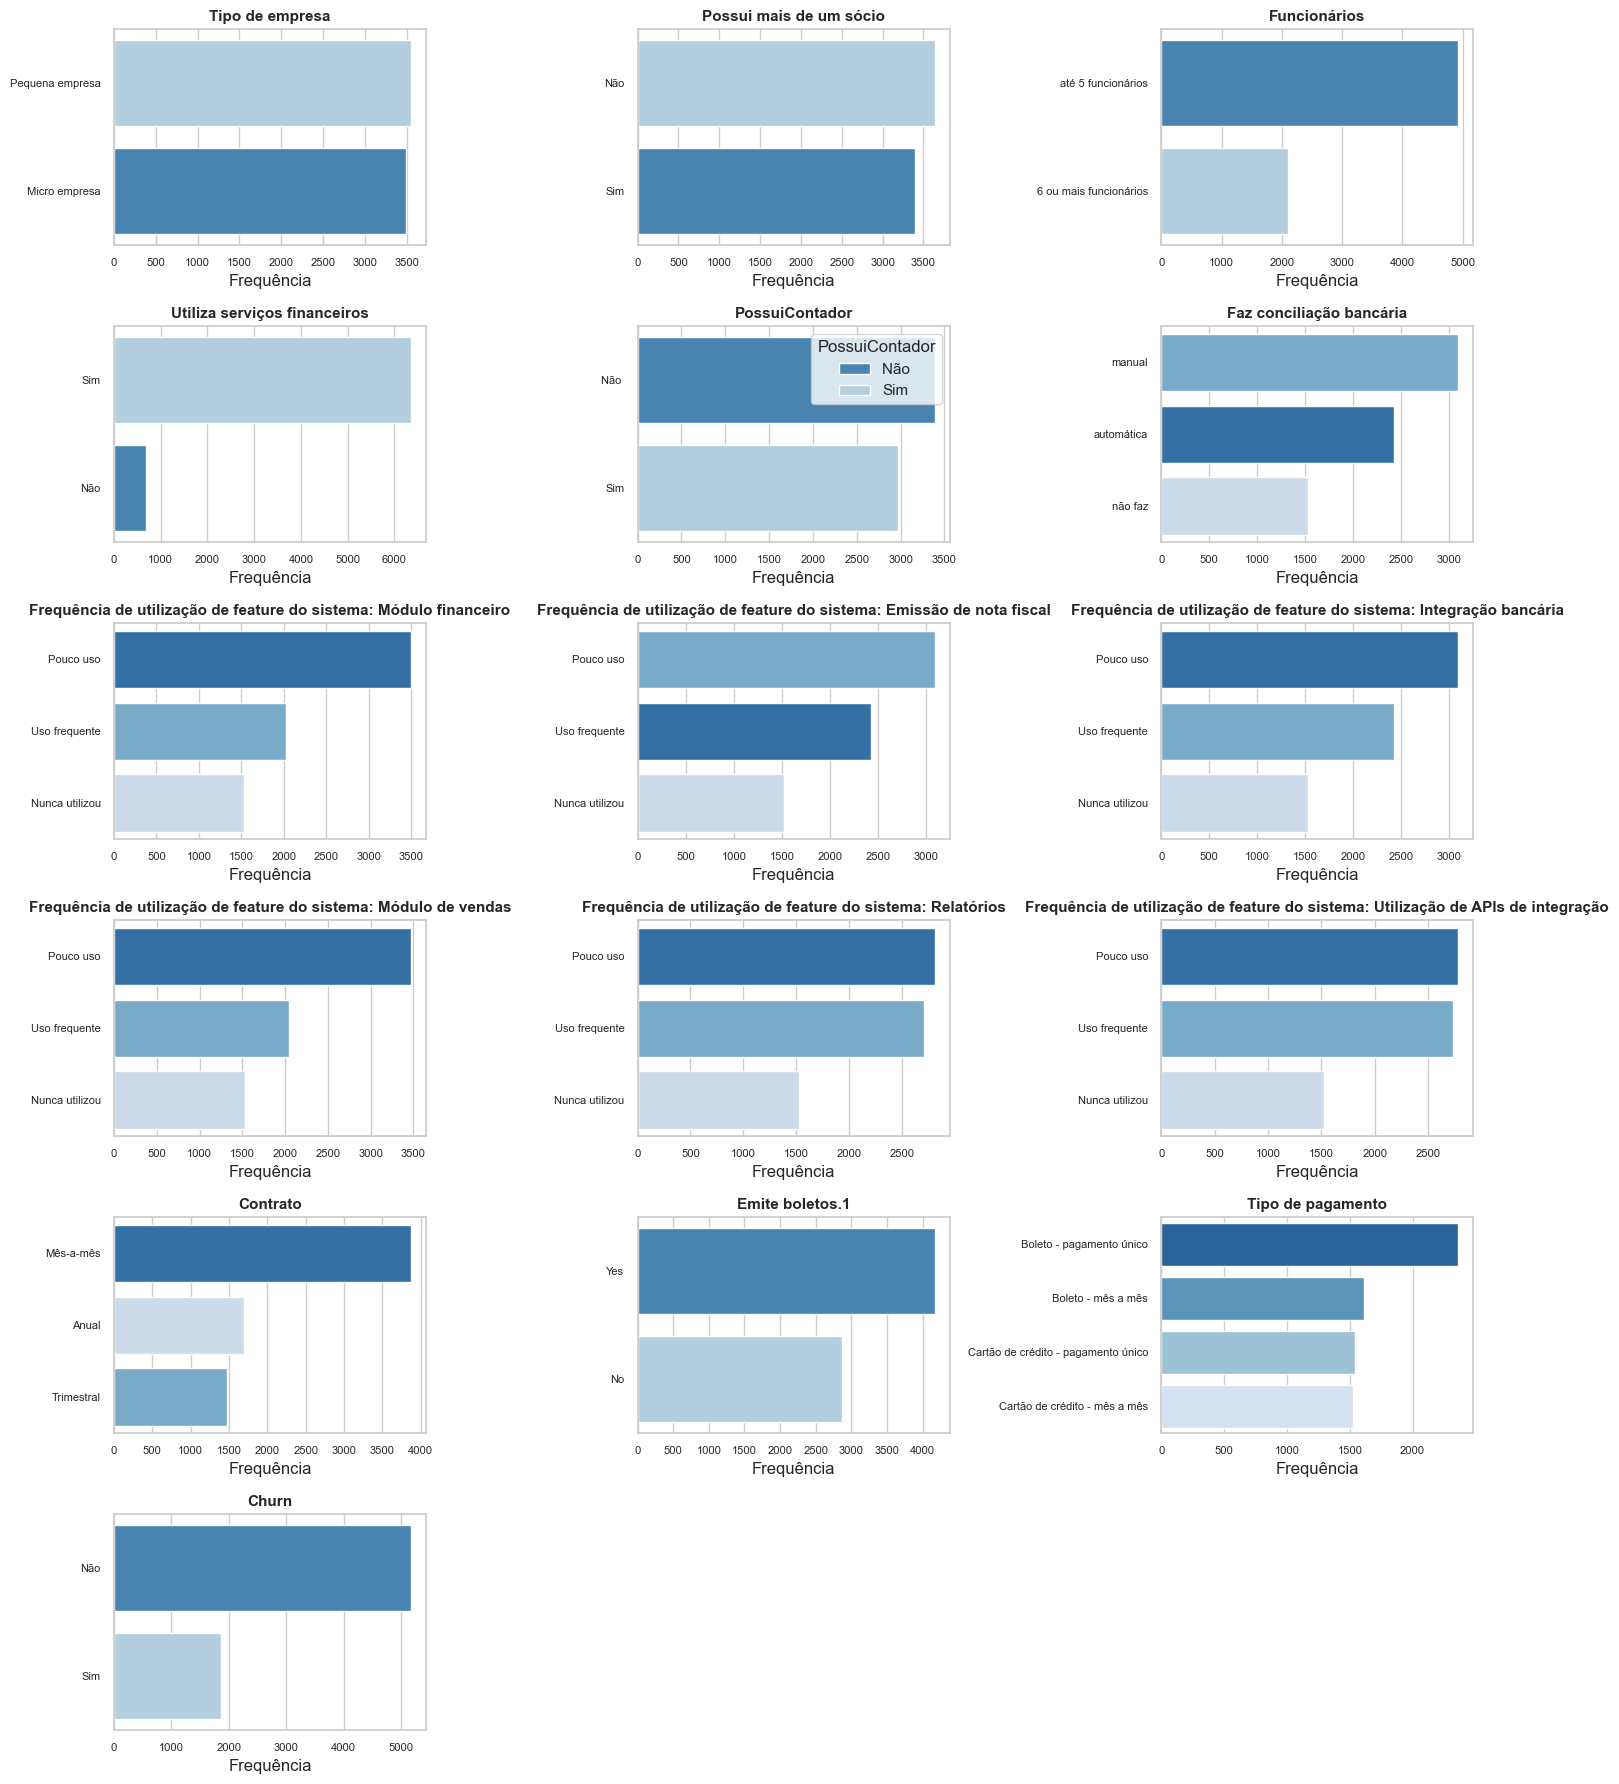

In [13]:
sns.set_theme(style="whitegrid") 
sns.set_palette("Blues_r")        
cat_cols = df.select_dtypes(include=["object"]).columns

n = len(cat_cols)
ncols = 3
nrows = math.ceil(n / ncols)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 3*nrows))

axes = axes.flatten()
for i, col in enumerate(cat_cols):
    sns.countplot(
        y=col, 
        data=df, 
        order=df[col].value_counts().index, 
        hue=col,
        ax=axes[i],
        palette="Blues_r"
    )
    axes[i].set_title(f"{col}", fontsize=11, fontweight="bold")
    axes[i].set_xlabel("Frequência")
    axes[i].set_ylabel("")
    axes[i].tick_params(axis="y", labelsize=8)
    axes[i].tick_params(axis="x", labelsize=8)
    
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

- Tipo de empresa: A maioria é microempresa.

- Possui mais de um sócio: Predomínio de empresas com mais de um sócio.

- Funcionários: Maioria tem até 5 funcionários.

- Utiliza serviços financeiros: Grande parte utiliza serviços financeiros.

- Possui contador: Ter contador é maioria entre as empresas.

- Faz conciliação bancária: Predomínio de processos automáticos, seguidos de manuais.

- Módulo financeiro: Uso frequente é maioria, mas há grupo considerável que nunca utilizou.

- Emissão de nota fiscal: Uso frequente é predominante.

- Integração bancária: Frequente, mas com número expressivo de não usuários.

- Módulo de vendas: Menor adesão comparado a outros módulos; muitos nunca utilizaram.

- Relatórios: Bastante utilizado, mas com parte relevante de pouco uso.

- APIs de integração: Uso frequente, mas ainda há muitos que nunca utilizaram.

- Contrato: Modelo mensal é predominante.

- Emite boletos: A maioria emite boletos.

- Tipo de pagamento: Boleto mensal lidera, seguido de cartão de crédito mensal.

- Churn: Maioria não cancelou, mas há uma taxa relevante de churn.

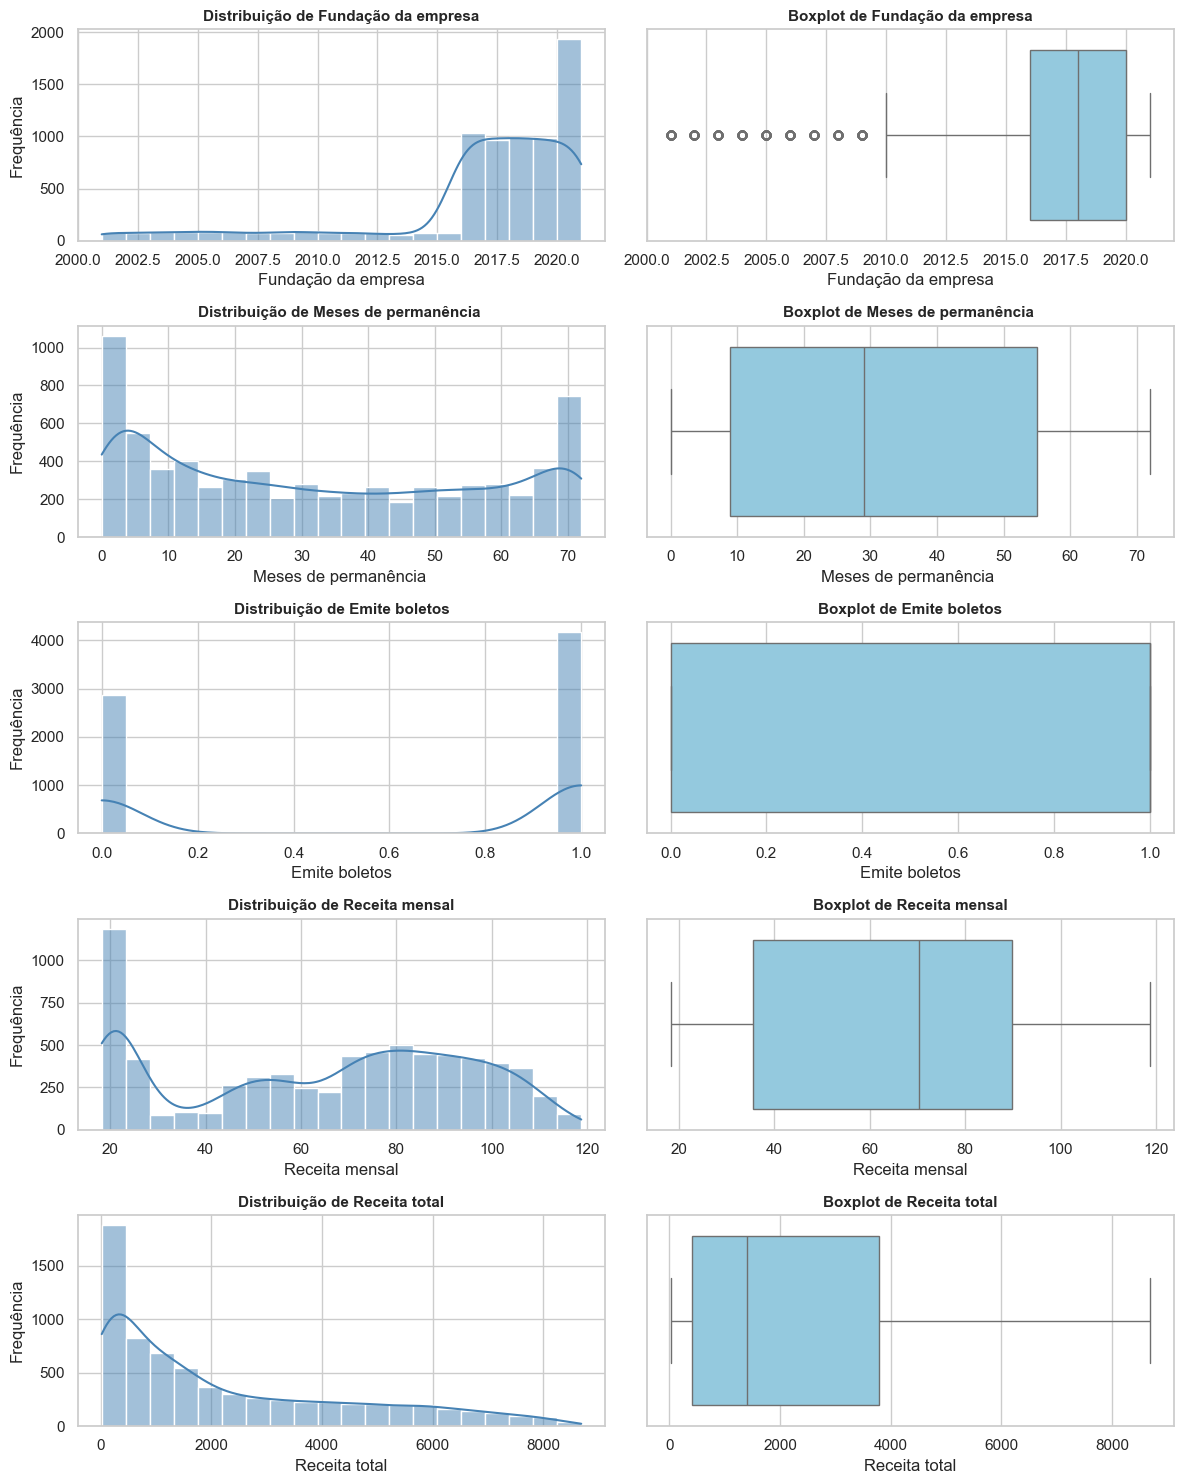

In [14]:
sns.set_theme(style="whitegrid")
sns.set_palette("Blues_r")
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
num_cols = [c for c in num_cols if c.lower() not in ["id"]] 

n = len(num_cols)
ncols = 2 
nrows = n

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 3*nrows))

for i, col in enumerate(num_cols):
    sns.histplot(df[col].dropna(), kde=True, bins=20, ax=axes[i,0], color="steelblue")
    axes[i,0].set_title(f"Distribuição de {col}", fontsize=11, fontweight="bold")
    axes[i,0].set_xlabel(col)
    axes[i,0].set_ylabel("Frequência")
    
    sns.boxplot(x=df[col], ax=axes[i,1], color="skyblue")
    axes[i,1].set_title(f"Boxplot de {col}", fontsize=11, fontweight="bold")
    axes[i,1].set_xlabel(col)
    axes[i,1].set_ylabel("")

plt.tight_layout()
plt.show()

- Fundação da empresa: Maioria fundada após 2015; concentração forte em anos recentes.

- Meses de permanência: Distribuição bimodal — muitos clientes no início e no máximo de permanência (≈70 meses).

- Emite boletos: Empresas se dividem entre dois polos claros — maioria não emite ou emite sempre.

- Receita mensal: Predominância entre 20 e 120; mediana próxima de 60.

- Receita total: Distribuição assimétrica à direita, com muitas empresas de baixa receita e poucos outliers de alta receita.

### Análise Bivariada

##### Churn × Tipo de empresa (categórica)

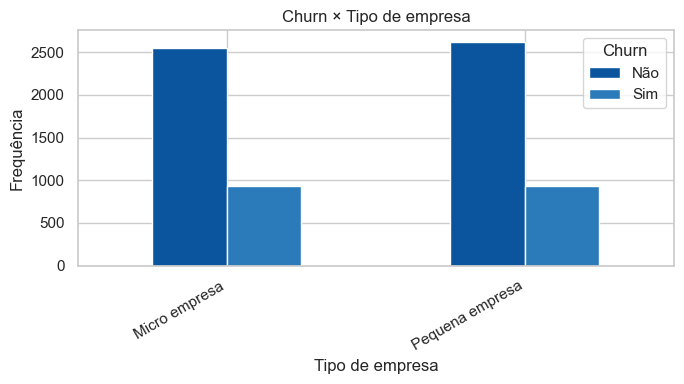

In [15]:
tmp = (df.dropna(subset=["Tipo de empresa","Churn"])
         .groupby(["Tipo de empresa","Churn"]).size()
         .unstack(fill_value=0))

ax = tmp.plot(kind="bar", figsize=(7,4))
plt.title("Churn × Tipo de empresa"); plt.xlabel("Tipo de empresa"); plt.ylabel("Frequência")
plt.xticks(rotation=30, ha="right"); plt.legend(title="Churn"); plt.tight_layout(); plt.show()

In [16]:
cont = pd.crosstab(df["Tipo de empresa"], df["Churn"])
chi2, p, dof, expected = chi2_contingency(cont)

print("Qui-quadrado - Tipo de empresa × Churn")
print(f"p-valor = {p:.6e}")
print("→ Associação significativa" if p < 0.05 else "→ Sem associação significativa")

Qui-quadrado - Tipo de empresa × Churn
p-valor = 4.865787e-01
→ Sem associação significativa


- O tipo de empresa (Micro vs Pequena) não apresenta associação estatisticamente significativa com o churn (p = 0,49). 
Ou seja, a taxa de cancelamento é semelhante entre os dois grupos

##### Churn × Fundação da empresa (numérica/ano)

C:\Users\josie\AppData\Local\Temp\ipykernel_3844\2680596347.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showfliers=True)


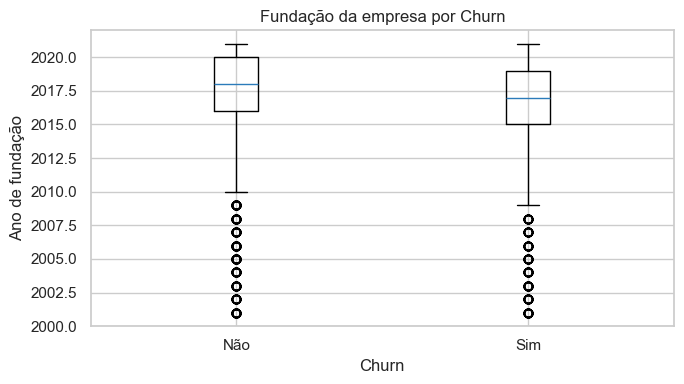

In [17]:
tmp = df.dropna(subset=["Fundação da empresa","Churn"])
labels = tmp["Churn"].unique()
data = [tmp.loc[tmp["Churn"]==c, "Fundação da empresa"] for c in labels]

plt.figure(figsize=(7,4))
plt.boxplot(data, labels=labels, showfliers=True)
plt.title("Fundação da empresa por Churn"); plt.xlabel("Churn"); plt.ylabel("Ano de fundação")
plt.tight_layout(); plt.show()

In [18]:
g1 = df.loc[df["Churn"]=="Sim", "Fundação da empresa"].dropna()
g2 = df.loc[df["Churn"]=="Não", "Fundação da empresa"].dropna()

stat, p = mannwhitneyu(g1, g2, alternative="two-sided")

print("Mann-Whitney - Fundação da empresa × Churn")
print(f"p-valor = {p:.6e}")
print("→ Diferença significativa" if p < 0.05 else "→ Sem diferença significativa")

Mann-Whitney - Fundação da empresa × Churn
p-valor = 1.932065e-18
→ Diferença significativa


- O ano de fundação das empresas difere significativamente entre clientes que cancelaram e os que permaneceram (p < 0,001). 

- Empresas mais recentes apresentam maior propensão ao churn.

##### Churn × Possui mais de um sócio (categórica)

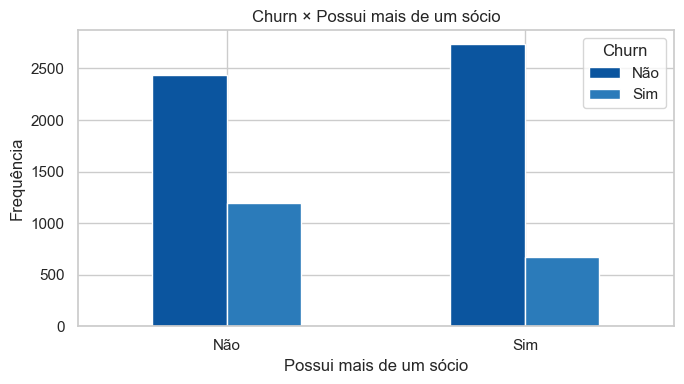

In [19]:
tmp = (df.dropna(subset=["Possui mais de um sócio","Churn"])
         .groupby(["Possui mais de um sócio","Churn"]).size()
         .unstack(fill_value=0))

ax = tmp.plot(kind="bar", figsize=(7,4))
plt.title("Churn × Possui mais de um sócio"); plt.xlabel("Possui mais de um sócio"); plt.ylabel("Frequência")
plt.xticks(rotation=0); plt.legend(title="Churn"); plt.tight_layout(); plt.show()

In [20]:
cont = pd.crosstab(df["Possui mais de um sócio"], df["Churn"])
chi2, p, dof, expected = chi2_contingency(cont)

print("Qui-quadrado - Sócio × Churn")
print(f"p-valor = {p:.6e}")
print("→ Associação significativa" if p < 0.05 else "→ Sem associação significativa")

Qui-quadrado - Sócio × Churn
p-valor = 2.139911e-36
→ Associação significativa


- Há associação significativa entre ter mais de um sócio e o churn (p < 0,001). 
- Empresas com múltiplos sócios apresentam menor propensão ao cancelamento.

##### Churn × Funcionários (categórica ordinal)

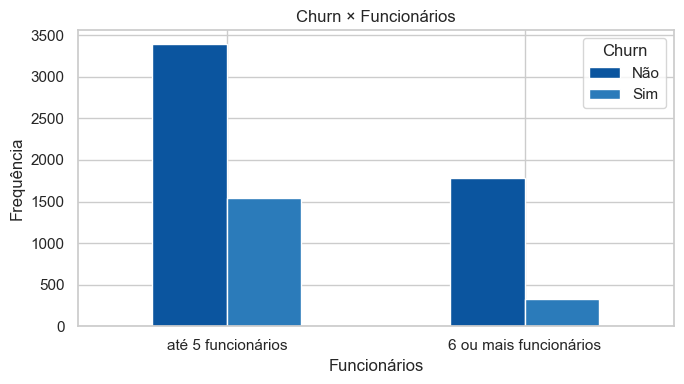

In [21]:
order = ["até 5 funcionários","6 ou mais funcionários"] if "6 ou mais funcionários" in df["Funcionários"].unique() else None
tmp = (df.dropna(subset=["Funcionários","Churn"])
         .groupby(["Funcionários","Churn"]).size()
         .unstack(fill_value=0).reindex(order) if order else
       (df.dropna(subset=["Funcionários","Churn"])
         .groupby(["Funcionários","Churn"]).size()
         .unstack(fill_value=0)))

tmp.plot(kind="bar", figsize=(7,4))
plt.title("Churn × Funcionários"); plt.xlabel("Funcionários"); plt.ylabel("Frequência")
plt.xticks(rotation=0); plt.legend(title="Churn"); plt.tight_layout(); plt.show()

In [22]:
cont = pd.crosstab(df["Funcionários"], df["Churn"])
chi2, p, dof, expected = chi2_contingency(cont)

print("Qui-quadrado - Funcionários × Churn")
print(f"p-valor = {p:.6e}")
print("→ Associação significativa" if p < 0.05 else "→ Sem associação significativa")

Qui-quadrado - Funcionários × Churn
p-valor = 4.924922e-43
→ Associação significativa


- Existe associação significativa entre o número de funcionários e o churn (p < 0,001). 
- Empresas com mais de 5 funcionários têm menor probabilidade de cancelamento

##### Churn × Meses de permanência (numérica)

C:\Users\josie\AppData\Local\Temp\ipykernel_3844\2598162196.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)


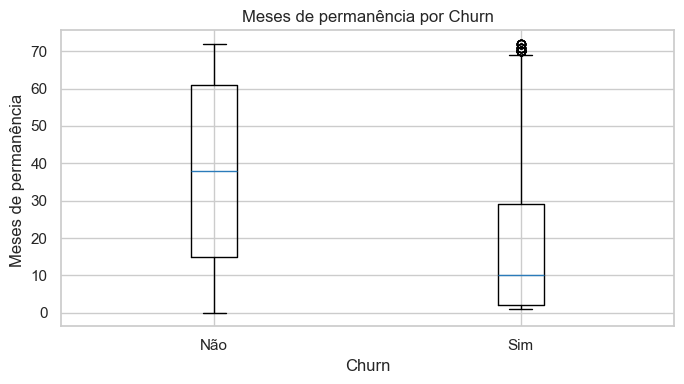

In [23]:
tmp = df.dropna(subset=["Meses de permanência ","Churn"])
labels = tmp["Churn"].unique()
data = [tmp.loc[tmp["Churn"]==c, "Meses de permanência "] for c in labels]

plt.figure(figsize=(7,4))
plt.boxplot(data, labels=labels)
plt.title("Meses de permanência por Churn"); plt.xlabel("Churn"); plt.ylabel("Meses de permanência ")
plt.tight_layout(); plt.show()

In [24]:
g1 = df.loc[df["Churn"]=="Sim", "Meses de permanência "].dropna()
g2 = df.loc[df["Churn"]=="Não", "Meses de permanência "].dropna()

stat, p = mannwhitneyu(g1, g2, alternative="two-sided")

print("Mann-Whitney - Meses de permanência × Churn")
print(f"p-valor = {p:.6e}")
print("→ Diferença significativa" if p < 0.05 else "→ Sem diferença significativa")

Mann-Whitney - Meses de permanência × Churn
p-valor = 2.419636e-208
→ Diferença significativa


- O tempo de permanência difere significativamente entre os grupos (p < 0,001). 
- Clientes que cancelaram ficaram menos tempo na base em comparação aos que permaneceram.

##### Churn × Utiliza serviços financeiros (categórica)

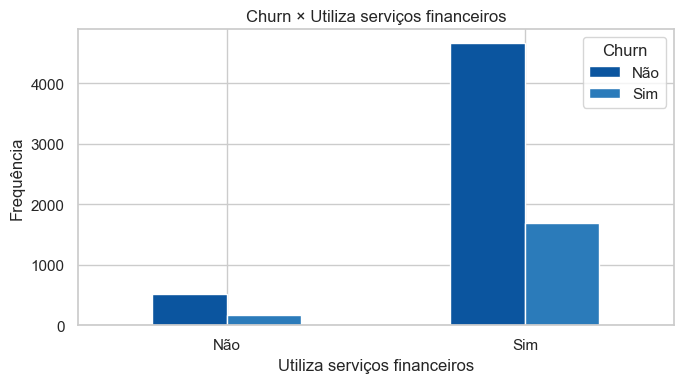

In [25]:
tmp = (df.dropna(subset=["Utiliza serviços financeiros","Churn"])
         .groupby(["Utiliza serviços financeiros","Churn"]).size()
         .unstack(fill_value=0))

tmp.plot(kind="bar", figsize=(7,4))
plt.title("Churn × Utiliza serviços financeiros"); plt.xlabel("Utiliza serviços financeiros"); plt.ylabel("Frequência")
plt.xticks(rotation=0); plt.legend(title="Churn"); plt.tight_layout(); plt.show()

In [26]:
cont = pd.crosstab(df["Utiliza serviços financeiros"], df["Churn"])
chi2, p, dof, expected = chi2_contingency(cont)

print("Qui-quadrado - Serviços financeiros × Churn")
print(f"p-valor = {p:.6e}")
print("→ Associação significativa" if p < 0.05 else "→ Sem associação significativa")

Qui-quadrado - Serviços financeiros × Churn
p-valor = 3.387825e-01
→ Sem associação significativa


- O uso de serviços financeiros não apresenta associação significativa com o churn (p = 0,34). 

- Ou seja, esse fator não influencia na retenção.

##### Churn × PossuiContador (categórica; trata NaN como “Não informado”)

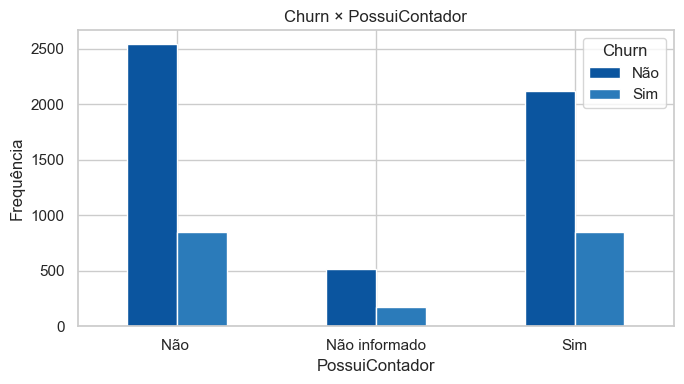

In [27]:
tmp = df.copy()
tmp["PossuiContador"] = tmp["PossuiContador"].fillna("Não informado")
tab = (tmp.groupby(["PossuiContador","Churn"]).size().unstack(fill_value=0))

tab.plot(kind="bar", figsize=(7,4))
plt.title("Churn × PossuiContador"); plt.xlabel("PossuiContador"); plt.ylabel("Frequência")
plt.xticks(rotation=0); plt.legend(title="Churn"); plt.tight_layout(); plt.show()

In [28]:
cont = pd.crosstab(df["PossuiContador"].fillna("Não informado"), df["Churn"])
chi2, p, dof, expected = chi2_contingency(cont)

print("Qui-quadrado - Possui Contador × Churn")
print(f"p-valor = {p:.6e}")
print("→ Associação significativa" if p < 0.05 else "→ Sem associação significativa")

Qui-quadrado - Possui Contador × Churn
p-valor = 3.464383e-03
→ Associação significativa


- Possuir contador apresenta associação significativa com o churn (p < 0,01). 
- Empresas sem contador têm maior propensão ao cancelamento.

##### Churn × Faz conciliação bancária (categórica: manual/automática/não faz)

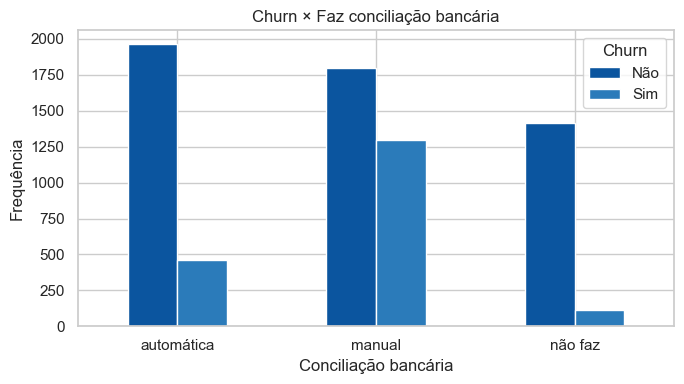

In [29]:
tmp = (df.dropna(subset=["Faz conciliação bancária","Churn"])
         .groupby(["Faz conciliação bancária","Churn"]).size()
         .unstack(fill_value=0))

tmp.plot(kind="bar", figsize=(7,4))
plt.title("Churn × Faz conciliação bancária"); plt.xlabel("Conciliação bancária"); plt.ylabel("Frequência")
plt.xticks(rotation=0); plt.legend(title="Churn"); plt.tight_layout(); plt.show()

In [30]:
cont = pd.crosstab(df["Faz conciliação bancária"], df["Churn"])
chi2, p, dof, expected = chi2_contingency(cont)

print("Qui-quadrado - Conciliação bancária × Churn")
print(f"p-valor = {p:.6e}")
print("→ Associação significativa" if p < 0.05 else "→ Sem associação significativa")

Qui-quadrado - Conciliação bancária × Churn
p-valor = 9.571788e-160
→ Associação significativa


- Há associação significativa entre conciliação bancária e churn (p < 0,001). 
- Empresas que realizam conciliação manual apresentam maior propensão ao cancelamento, enquanto as que usam conciliação automática têm maior retenção.

##### Churn × Módulo financeiro (freq. de uso) (categórica ordinal)

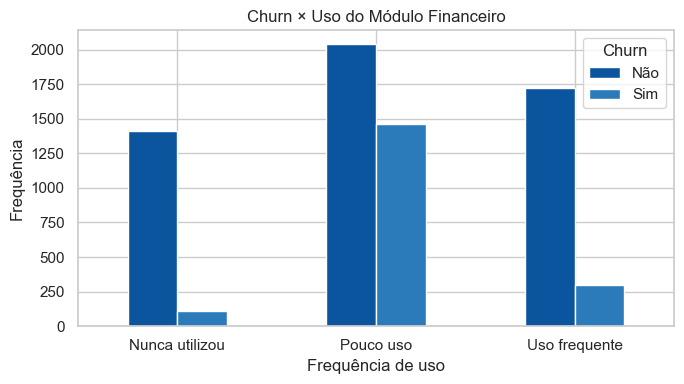

In [31]:
order = ["Nunca utilizou","Pouco uso","Uso frequente"]
tmp = (df.dropna(subset=["Frequência de utilização de feature do sistema: Módulo financeiro","Churn"])
         .groupby(["Frequência de utilização de feature do sistema: Módulo financeiro","Churn"]).size()
         .unstack(fill_value=0))
tmp = tmp.reindex(order)
tmp.plot(kind="bar", figsize=(7,4))
plt.title("Churn × Uso do Módulo Financeiro"); plt.xlabel("Frequência de uso"); plt.ylabel("Frequência")
plt.xticks(rotation=0); plt.legend(title="Churn"); plt.tight_layout(); plt.show()

In [32]:
col = "Frequência de utilização de feature do sistema: Módulo financeiro"
cont = pd.crosstab(df[col], df["Churn"])
chi2, p, dof, expected = chi2_contingency(cont)

print("Qui-quadrado - Módulo Financeiro × Churn")
print(f"p-valor = {p:.6e}")
print("→ Associação significativa" if p < 0.05 else "→ Sem associação significativa")

Qui-quadrado - Módulo Financeiro × Churn
p-valor = 2.661150e-185
→ Associação significativa


- Há associação significativa entre o uso do módulo financeiro e o churn (p < 0,001). 
- Clientes com uso frequente apresentam menor propensão ao cancelamento, enquanto o pouco uso está fortemente ligado ao churn.

##### Churn × Emissão de nota fiscal (freq. de uso)

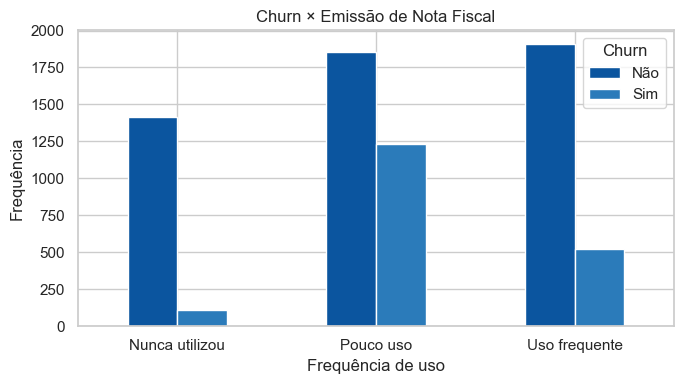

In [33]:
col = "Frequência de utilização de feature do sistema: Emissão de nota fiscal"
tmp = (df.dropna(subset=[col,"Churn"]).groupby([col,"Churn"]).size().unstack(fill_value=0))
tmp = tmp.reindex(["Nunca utilizou","Pouco uso","Uso frequente"])
tmp.plot(kind="bar", figsize=(7,4))
plt.title("Churn × Emissão de Nota Fiscal"); plt.xlabel("Frequência de uso"); plt.ylabel("Frequência")
plt.xticks(rotation=0); plt.legend(title="Churn"); plt.tight_layout(); plt.show()

In [34]:
col = "Frequência de utilização de feature do sistema: Emissão de nota fiscal"
cont = pd.crosstab(df[col], df["Churn"])
chi2, p, dof, expected = chi2_contingency(cont)

print("Qui-quadrado - Emissão de nota fiscal × Churn")
print(f"p-valor = {p:.6e}")
print("→ Associação significativa" if p < 0.05 else "→ Sem associação significativa")

Qui-quadrado - Emissão de nota fiscal × Churn
p-valor = 2.079759e-131
→ Associação significativa


- Existe associação significativa entre a emissão de nota fiscal e o churn (p < 0,001). 
- O uso frequente está ligado a maior retenção, enquanto o pouco uso aumenta a chance de cancelamento.

##### Churn × Integração bancária (freq. de uso)

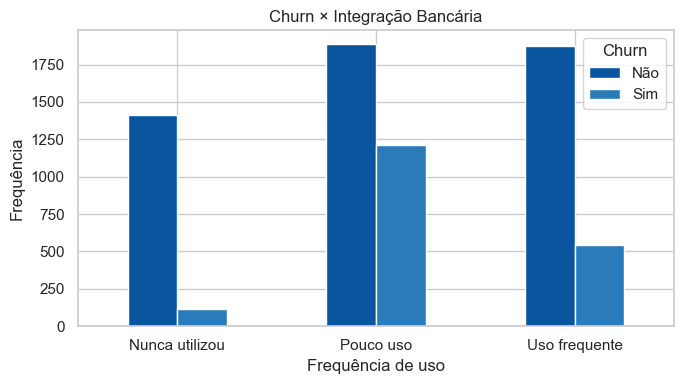

In [35]:
col = "Frequência de utilização de feature do sistema: Integração bancária"
tmp = (df.dropna(subset=[col,"Churn"]).groupby([col,"Churn"]).size().unstack(fill_value=0))
tmp = tmp.reindex(["Nunca utilizou","Pouco uso","Uso frequente"])
tmp.plot(kind="bar", figsize=(7,4))
plt.title("Churn × Integração Bancária"); plt.xlabel("Frequência de uso"); plt.ylabel("Frequência")
plt.xticks(rotation=0); plt.legend(title="Churn"); plt.tight_layout(); plt.show()

In [36]:
col = "Frequência de utilização de feature do sistema: Integração bancária"
cont = pd.crosstab(df[col], df["Churn"])
chi2, p, dof, expected = chi2_contingency(cont)

print("Qui-quadrado - Integração bancária × Churn")
print(f"p-valor = {p:.6e}")
print("→ Associação significativa" if p < 0.05 else "→ Sem associação significativa")

Qui-quadrado - Integração bancária × Churn
p-valor = 5.505219e-122
→ Associação significativa


- Há associação significativa entre integração bancária e churn (p < 0,001). 
- Clientes que fazem uso frequente têm maior retenção, enquanto o pouco uso está mais relacionado ao cancelamento.

##### Churn × Módulo de vendas (freq. de uso)

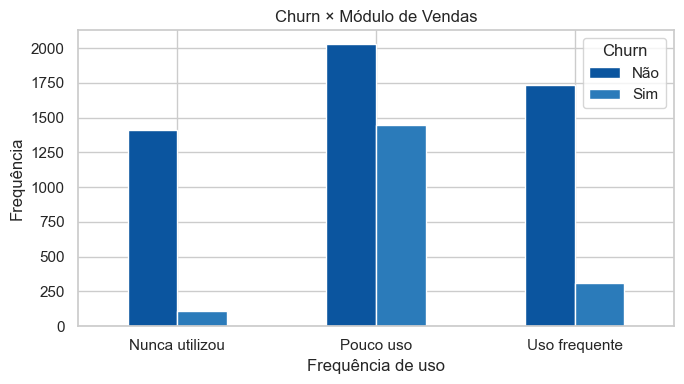

In [37]:
col = "Frequência de utilização de feature do sistema: Módulo de vendas"
tmp = (df.dropna(subset=[col,"Churn"]).groupby([col,"Churn"]).size().unstack(fill_value=0))
tmp = tmp.reindex(["Nunca utilizou","Pouco uso","Uso frequente"])
tmp.plot(kind="bar", figsize=(7,4))
plt.title("Churn × Módulo de Vendas"); plt.xlabel("Frequência de uso"); plt.ylabel("Frequência")
plt.xticks(rotation=0); plt.legend(title="Churn"); plt.tight_layout(); plt.show()

In [38]:
col = "Frequência de utilização de feature do sistema: Módulo de vendas"
cont = pd.crosstab(df[col], df["Churn"])
chi2, p, dof, expected = chi2_contingency(cont)

print("Qui-quadrado - Módulo de vendas × Churn")
print(f"p-valor = {p:.6e}")
print("→ Associação significativa" if p < 0.05 else "→ Sem associação significativa")

Qui-quadrado - Módulo de vendas × Churn
p-valor = 1.443084e-180
→ Associação significativa


- Existe associação significativa entre o uso do módulo de vendas e o churn (p < 0,001). 
- O uso frequente está ligado à retenção, enquanto o pouco uso aumenta a chance de cancelamento.

##### Churn × Relatórios (freq. de uso)

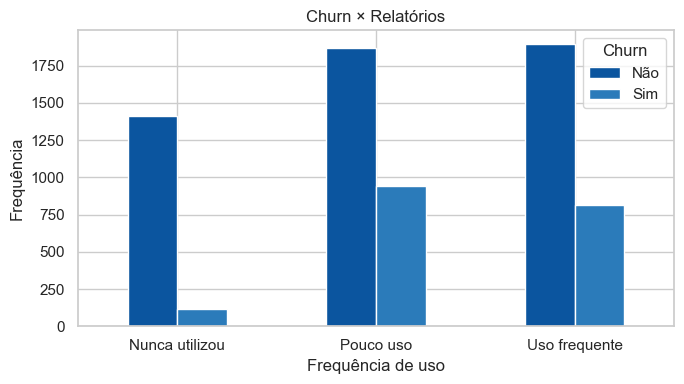

In [39]:
col = "Frequência de utilização de feature do sistema: Relatórios"
tmp = (df.dropna(subset=[col,"Churn"]).groupby([col,"Churn"]).size().unstack(fill_value=0))
tmp = tmp.reindex(["Nunca utilizou","Pouco uso","Uso frequente"])
tmp.plot(kind="bar", figsize=(7,4))
plt.title("Churn × Relatórios"); plt.xlabel("Frequência de uso"); plt.ylabel("Frequência")
plt.xticks(rotation=0); plt.legend(title="Churn"); plt.tight_layout(); plt.show()

In [40]:
col = "Frequência de utilização de feature do sistema: Relatórios"
cont = pd.crosstab(df[col], df["Churn"])
chi2, p, dof, expected = chi2_contingency(cont)

print("Qui-quadrado - Relatórios × Churn")
print(f"p-valor = {p:.6e}")
print("→ Associação significativa" if p < 0.05 else "→ Sem associação significativa")

Qui-quadrado - Relatórios × Churn
p-valor = 5.528994e-82
→ Associação significativa


- Há associação significativa entre o uso de relatórios e o churn (p < 0,001). 
- O uso frequente está relacionado à maior retenção, enquanto o pouco uso aumenta a probabilidade de cancelamento.

##### Churn × APIs de integração (freq. de uso)

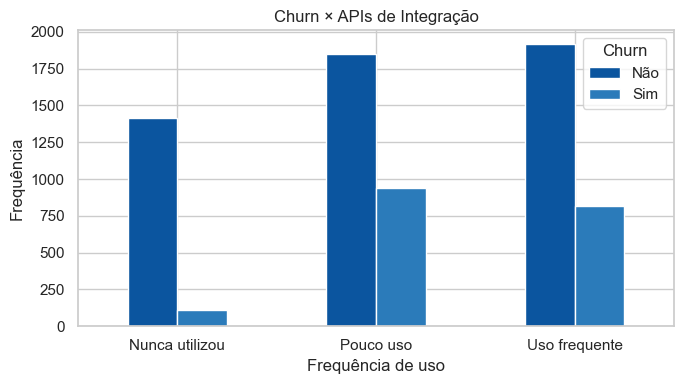

In [41]:
col = "Frequência de utilização de feature do sistema: Utilização de APIs de integração"
tmp = (df.dropna(subset=[col,"Churn"]).groupby([col,"Churn"]).size().unstack(fill_value=0))
tmp = tmp.reindex(["Nunca utilizou","Pouco uso","Uso frequente"])
tmp.plot(kind="bar", figsize=(7,4))
plt.title("Churn × APIs de Integração"); plt.xlabel("Frequência de uso"); plt.ylabel("Frequência")
plt.xticks(rotation=0); plt.legend(title="Churn"); plt.tight_layout(); plt.show()

In [42]:
col = "Frequência de utilização de feature do sistema: Utilização de APIs de integração"
cont = pd.crosstab(df[col], df["Churn"])
chi2, p, dof, expected = chi2_contingency(cont)

print("Qui-quadrado - APIs de integração × Churn")
print(f"p-valor = {p:.6e}")
print("→ Associação significativa" if p < 0.05 else "→ Sem associação significativa")

Qui-quadrado - APIs de integração × Churn
p-valor = 2.667757e-82
→ Associação significativa


- Existe associação significativa entre o uso de APIs de integração e o churn (p < 0,001). 
- O uso frequente está ligado à retenção, enquanto o pouco uso aumenta a chance de cancelamento.

##### Churn × Contrato (categórica)

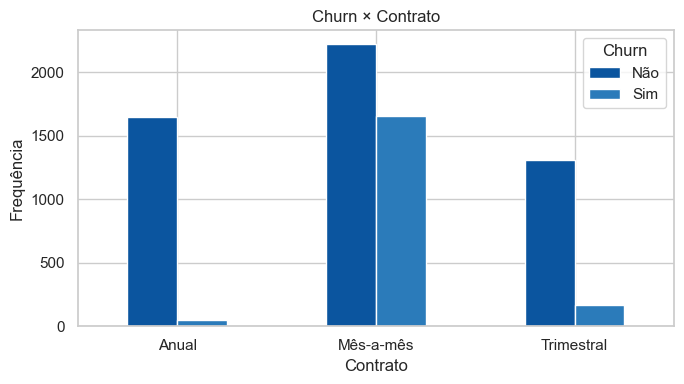

In [43]:
tmp = (df.dropna(subset=["Contrato","Churn"])
         .groupby(["Contrato","Churn"]).size()
         .unstack(fill_value=0))

tmp.plot(kind="bar", figsize=(7,4))
plt.title("Churn × Contrato"); plt.xlabel("Contrato"); plt.ylabel("Frequência")
plt.xticks(rotation=0); plt.legend(title="Churn"); plt.tight_layout(); plt.show()

In [44]:
cont = pd.crosstab(df["Contrato"], df["Churn"])
chi2, p, dof, expected = chi2_contingency(cont)

print("Qui-quadrado - Contrato × Churn")
print(f"p-valor = {p:.6e}")
print("→ Associação significativa" if p < 0.05 else "→ Sem associação significativa")

Qui-quadrado - Contrato × Churn
p-valor = 5.863038e-258
→ Associação significativa


- Há associação significativa entre o tipo de contrato e o churn (p < 0,001). 
- Contratos anuais e trimestrais estão ligados a maior retenção, enquanto o mês a mês apresenta maior risco de cancelamento.

##### Churn × Emite boletos (binária 0/1)

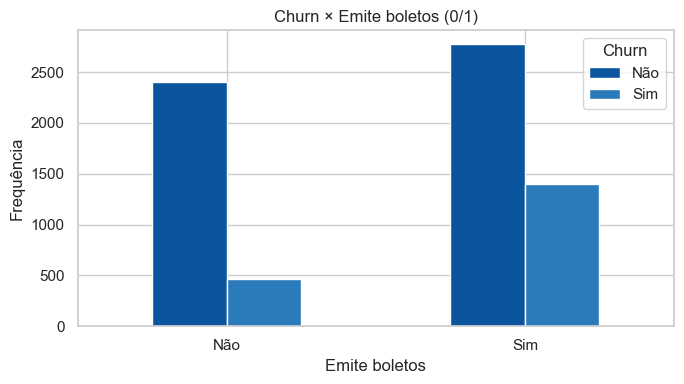

In [45]:
tmp = (df.dropna(subset=["Emite boletos","Churn"])
         .assign(**{"Emite boletos": df["Emite boletos"].map({0:"Não",1:"Sim"})})
         .groupby(["Emite boletos","Churn"]).size()
         .unstack(fill_value=0))

tmp.plot(kind="bar", figsize=(7,4))
plt.title("Churn × Emite boletos (0/1)"); plt.xlabel("Emite boletos"); plt.ylabel("Frequência")
plt.xticks(rotation=0); plt.legend(title="Churn"); plt.tight_layout(); plt.show()

In [46]:
tmp = df["Emite boletos"].map({0:"Não",1:"Sim"}).fillna("Não informado")
cont = pd.crosstab(tmp, df["Churn"])
chi2, p, dof, expected = chi2_contingency(cont)

print("Qui-quadrado - Emite boletos × Churn")
print(f"p-valor = {p:.6e}")
print("→ Associação significativa" if p < 0.05 else "→ Sem associação significativa")

Qui-quadrado - Emite boletos × Churn
p-valor = 4.073355e-58
→ Associação significativa


- Existe associação significativa entre emitir boletos e o churn (p < 0,001). 
- Empresas que emitem boletos apresentam maior propensão ao cancelamento.

##### Churn × Emite boletos.1 (Yes/No)

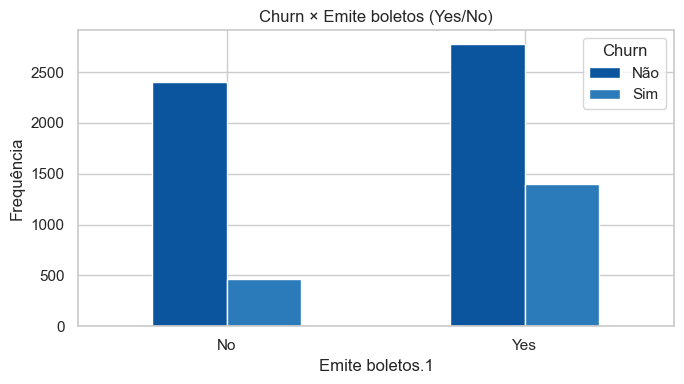

In [47]:
tmp = (df.dropna(subset=["Emite boletos.1","Churn"])
         .groupby(["Emite boletos.1","Churn"]).size()
         .unstack(fill_value=0))

tmp.plot(kind="bar", figsize=(7,4))
plt.title("Churn × Emite boletos (Yes/No)"); plt.xlabel("Emite boletos.1"); plt.ylabel("Frequência")
plt.xticks(rotation=0); plt.legend(title="Churn"); plt.tight_layout(); plt.show()

In [48]:
cont = pd.crosstab(df["Emite boletos.1"], df["Churn"])
chi2, p, dof, expected = chi2_contingency(cont)

print("Qui-quadrado - Emite boletos.1 × Churn")
print(f"p-valor = {p:.6e}")
print("→ Associação significativa" if p < 0.05 else "→ Sem associação significativa")

Qui-quadrado - Emite boletos.1 × Churn
p-valor = 4.073355e-58
→ Associação significativa


- Confirmando a variável duplicada, há associação significativa entre emitir boletos e o churn (p < 0,001). 
- Empresas que emitem boletos apresentam maior risco de cancelamento.

##### Churn × Tipo de pagamento (categórica)

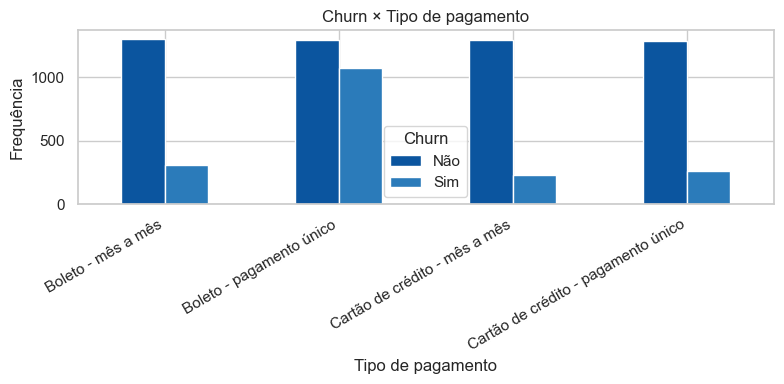

In [49]:
tmp = (df.dropna(subset=["Tipo de pagamento","Churn"])
         .groupby(["Tipo de pagamento","Churn"]).size()
         .unstack(fill_value=0))

tmp.plot(kind="bar", figsize=(8,4))
plt.title("Churn × Tipo de pagamento"); plt.xlabel("Tipo de pagamento"); plt.ylabel("Frequência")
plt.xticks(rotation=30, ha="right"); plt.legend(title="Churn"); plt.tight_layout(); plt.show()

In [50]:
cont = pd.crosstab(df["Tipo de pagamento"], df["Churn"])
chi2, p, dof, expected = chi2_contingency(cont)

print("Qui-quadrado - Tipo de pagamento × Churn")
print(f"p-valor = {p:.6e}")
print("→ Associação significativa" if p < 0.05 else "→ Sem associação significativa")

Qui-quadrado - Tipo de pagamento × Churn
p-valor = 3.682355e-140
→ Associação significativa


- Há associação significativa entre o tipo de pagamento e o churn (p < 0,001). 
- O boleto mês a mês concentra maior risco de cancelamento, enquanto pagamento único ou cartão de crédito estão ligados a maior retenção.

##### Churn × Receita mensal (numérica)

C:\Users\josie\AppData\Local\Temp\ipykernel_3844\3726543701.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)


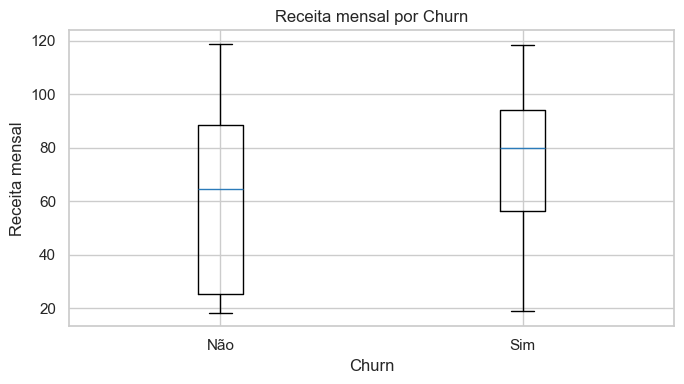

In [51]:
tmp = df.dropna(subset=["Receita mensal","Churn"])
labels = tmp["Churn"].unique()
data = [tmp.loc[tmp["Churn"]==c, "Receita mensal"] for c in labels]

plt.figure(figsize=(7,4))
plt.boxplot(data, labels=labels)
plt.title("Receita mensal por Churn"); plt.xlabel("Churn"); plt.ylabel("Receita mensal")
plt.tight_layout(); plt.show()

In [52]:
g1 = df.loc[df["Churn"]=="Sim", "Receita mensal"].dropna()
g2 = df.loc[df["Churn"]=="Não", "Receita mensal"].dropna()

stat, p = mannwhitneyu(g1, g2, alternative="two-sided")

print("Mann-Whitney - Receita mensal × Churn")
print(f"p-valor = {p:.6e}")
print("→ Diferença significativa" if p < 0.05 else "→ Sem diferença significativa")

Mann-Whitney - Receita mensal × Churn
p-valor = 3.311628e-54
→ Diferença significativa


- A receita mensal difere significativamente entre os grupos (p < 0,001). 
- Clientes que cancelaram tendem a ter maior ticket médio mensal do que os que permaneceram.

##### Churn × Receita total (numérica)

C:\Users\josie\AppData\Local\Temp\ipykernel_3844\2666085569.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)


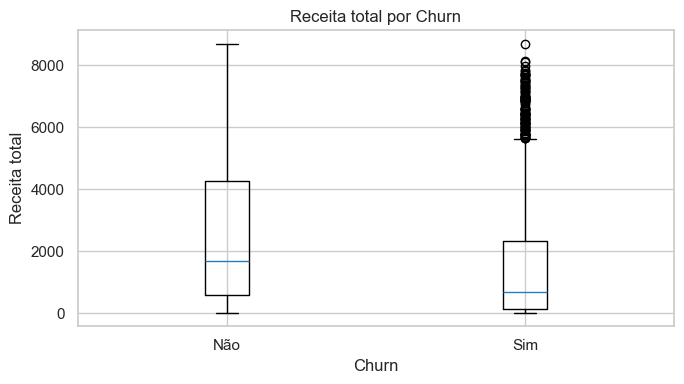

In [53]:
tmp = df.dropna(subset=["Receita total","Churn"])
labels = tmp["Churn"].unique()
data = [tmp.loc[tmp["Churn"]==c, "Receita total"] for c in labels]

plt.figure(figsize=(7,4))
plt.boxplot(data, labels=labels)
plt.title("Receita total por Churn"); plt.xlabel("Churn"); plt.ylabel("Receita total")
plt.tight_layout(); plt.show()

In [54]:
g1 = df.loc[df["Churn"]=="Sim", "Receita total"].dropna()
g2 = df.loc[df["Churn"]=="Não", "Receita total"].dropna()

stat, p = mannwhitneyu(g1, g2, alternative="two-sided")

print("Mann-Whitney - Receita total × Churn")
print(f"p-valor = {p:.6e}")
print("→ Diferença significativa" if p < 0.05 else "→ Sem diferença significativa")

Mann-Whitney - Receita total × Churn
p-valor = 1.995985e-84
→ Diferença significativa


- A receita total difere significativamente entre os grupos (p < 0,001). 
- Clientes que permanecem geram receita acumulada muito maior do que os que cancelam.

#### Separação dos dados

In [56]:
X = df.drop(columns = "Churn")
y = df["Churn"].values

In [57]:
X = df.drop(columns=["ID", "Churn"])
y = df["Churn"].map({"Sim":1, "Não":0})

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

### Modelo baseline

== Modelo Baseline (Dummy Stratified) ==
              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1035
           1       0.29      0.29      0.29       374

    accuracy                           0.62      1409
   macro avg       0.52      0.52      0.52      1409
weighted avg       0.62      0.62      0.62      1409



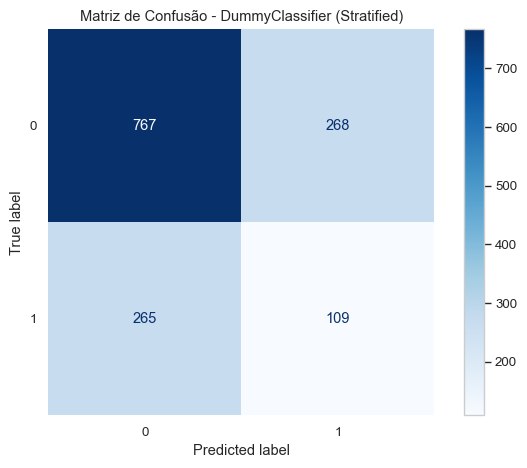

In [58]:
# modelo baseline estratificado
dummy_strat = DummyClassifier(strategy="stratified", random_state=42)
dummy_strat.fit(X_train, y_train)

# previsões
y_pred_dummy_strat = dummy_strat.predict(X_test)
y_proba_dummy_strat = dummy_strat.predict_proba(X_test)[:, 1]

# métricas
print("== Modelo Baseline (Dummy Stratified) ==")
print(classification_report(y_test, y_pred_dummy_strat))


# matriz de confusão
disp = ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_dummy_strat, cmap="Blues", colorbar=True
)
plt.title("Matriz de Confusão - DummyClassifier (Stratified)")
plt.gca().spines[:].set_visible(False)
plt.grid(False)
plt.tight_layout()
plt.show()

- O modelo não aprende padrões reais, apenas simula aleatoriedade estratificada — por isso a performance é próxima ao acaso.

- A acurácia (62%) reflete apenas o desbalanceamento da base, não qualidade preditiva.

- A classe minoritária (1) tem baixa precisão e recall (0.29), mostrando que o baseline não consegue identificar churn de forma confiável.

ROC AUC: 0.5163


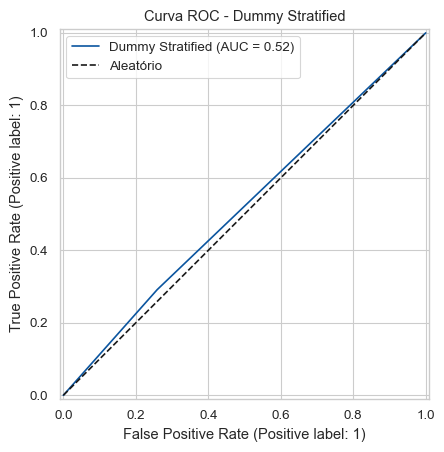

In [59]:
# curva ROC
print(f"ROC AUC: {roc_auc_score(y_test, y_proba_dummy_strat):.4f}")
RocCurveDisplay.from_predictions(y_test, y_proba_dummy_strat, name="Dummy Stratified")
plt.plot([0, 1], [0, 1], "k--", label="Aleatório")
plt.title("Curva ROC - Dummy Stratified")
plt.legend()
plt.show()

- A curva segue quase a linha aleatória, confirmando ausência de aprendizado real.

- O AUC ≈ 0.52 mostra desempenho praticamente igual ao acaso (0.5).

- O baseline não diferencia efetivamente positivos de negativos, servindo apenas como referência mínima.

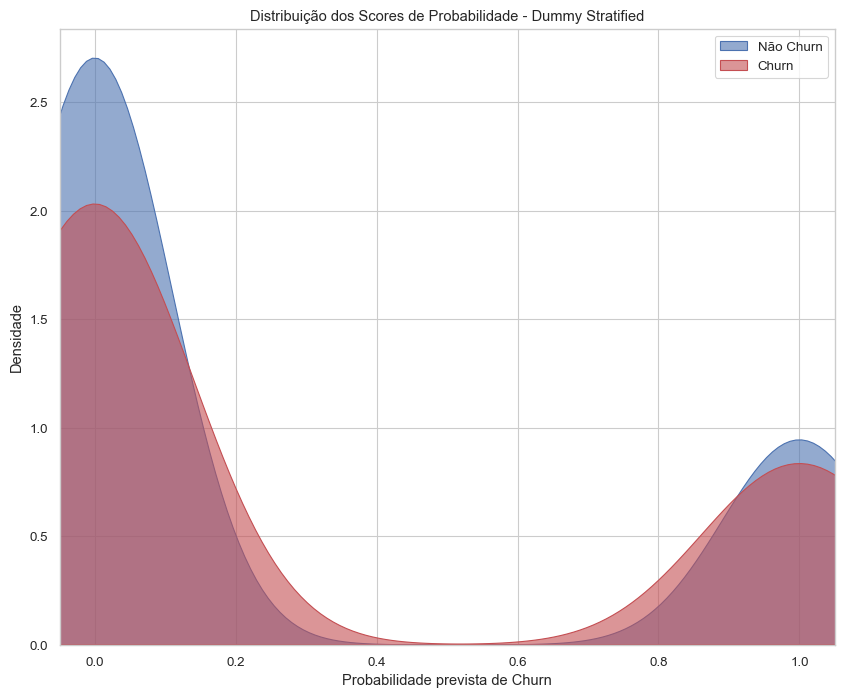

In [60]:
# distribuição de probabilidades (KDE)
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
sns.kdeplot(y_proba_dummy_strat[y_test == 0], ax=ax, color="b", fill=True, alpha=0.6, label="Não Churn")
sns.kdeplot(y_proba_dummy_strat[y_test == 1], ax=ax, color="r", fill=True, alpha=0.6, label="Churn")
plt.title("Distribuição dos Scores de Probabilidade - Dummy Stratified")
plt.xlabel("Probabilidade prevista de Churn")
plt.ylabel("Densidade")
plt.xlim(-0.05, 1.05)
plt.legend()
plt.grid(True)
plt.show()

- As curvas de Churn e Não Churn se sobrepõem fortemente, mostrando que o modelo não separa as classes.

- A distribuição concentra probabilidades em torno de 0 e 1 de forma aleatória, sem padrão real. 

- Reforça que o baseline não tem poder discriminativo, servindo apenas como referência mínima.

#### Pré-processamento

Cópia do DataFrame

- df = df.copy() → evita modificar o df original por acidente.

Tratamento de coluna duplicada

- Removeu "Emite boletos.1", que era redundante em relação a "Emite boletos".

Tratamento de valores ausentes em Receita Total

- Onde Receita total estava nula, você preencheu com:

- Receita total = Receita mensal * Meses de permanência, Isso cria consistência, já que faz sentido como proxy para receita acumulada.

Separação de variáveis numéricas e categóricas

- num_cols = todas as colunas numéricas.

- cat_cols = todas as colunas categóricas.

Definição do pré-processamento via ColumnTransformer:

- Numéricas:

- SimpleImputer(strategy="median") → preenche nulos com a mediana.

- StandardScaler() → padroniza (média = 0, desvio = 1).

- Categóricas:

- SimpleImputer(strategy="most_frequent") → preenche nulos com o valor mais frequente.

- OneHotEncoder(handle_unknown="ignore") → transforma categorias em variáveis dummies e ignora categorias desconhecidas.

- remainder="drop" → descarta colunas que não forem especificadas.


In [61]:
# Limpeza mínima do DF
df_clean = df.copy()

# Se existir a coluna duplicada, remova a versão textual
if "Emite boletos.1" in df_clean.columns:
    df_clean = df_clean.drop(columns=["Emite boletos.1", "ID"])

# Preencher 'Receita total' faltante com 'Receita mensal * Meses de permanência'
if "Receita total" in df_clean.columns and "Receita mensal" in df_clean.columns and "Meses de permanência" in df_clean.columns:
    mask_rt_na = df_clean["Receita total"].isna()
    df_clean.loc[mask_rt_na, "Receita total"] = (
        df_clean.loc[mask_rt_na, "Receita mensal"] * df_clean.loc[mask_rt_na, "Meses de permanência"]
    )

# Seleção de colunas
num_cols = X.select_dtypes(include=["number"]).columns.tolist()
cat_cols = X.select_dtypes(exclude=["number"]).columns.tolist()

# Pré-processamento
preprocessor = ColumnTransformer(
    transformers=[
        ("num", Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="median")),
            ("scaler", StandardScaler())
        ]), num_cols),
        ("cat", Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("ohe", OneHotEncoder(handle_unknown="ignore"))
        ]), cat_cols),
    ],
    remainder="drop"
)

In [62]:
# calcula proporção para balancear as classes
scale = y_train.value_counts()[0] / y_train.value_counts()[1]
clf_xgb = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", XGBClassifier(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric="auc",
        scale_pos_weight=scale,  # 👈 balanceamento
        random_state=42,
        use_label_encoder=False
    ))
])

In [63]:
# treino e avaliação
clf_xgb.fit(X_train, y_train)
y_pred = clf_xgb.predict(X_test)

print(classification_report(y_test, y_pred))

c:\Projetos\Churn_Prediction\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:28:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.88      0.78      0.82      1035
           1       0.53      0.70      0.60       374

    accuracy                           0.76      1409
   macro avg       0.70      0.74      0.71      1409
weighted avg       0.78      0.76      0.76      1409



Insights do modelo XGBoost com scale_pos_weight:

- Classe 0 (Não Churn): perdeu um pouco de recall (0.78), mas manteve boa precisão (0.88).

- Classe 1 (Churn): recall subiu bastante (0.70), ou seja, o modelo detecta bem mais churns reais, embora a precisão tenha caído para 0.53.

- Acurácia global: 76%, mas mais equilibrada entre as classes.

- Macro F1 (0.71): melhor equilíbrio geral entre churn e não churn.

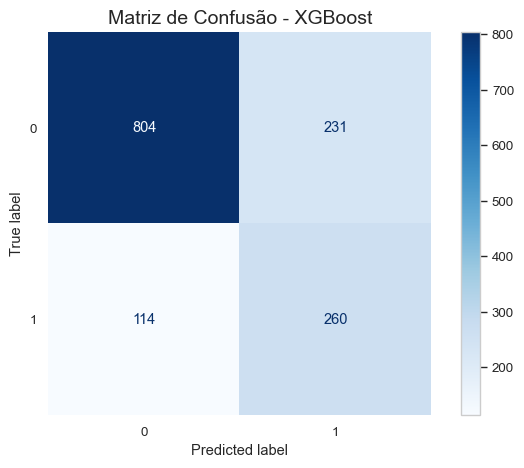

In [64]:
disp = ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    cmap="Blues",
    colorbar=True
)
plt.title("Matriz de Confusão - XGBoost", fontsize=14)
plt.gca().spines[:].set_visible(False)
plt.grid(False)
plt.tight_layout()
plt.show()

Insight da matriz de confusão:

- O modelo acerta bem Não Churn (804), mas ainda confunde muitos como churn (231).

- Para Churn, detecta 260 corretamente, mas deixa escapar 114.

- Padrão: bom em prever retenção, mas precisa melhorar na captura de churn.

<Figure size 600x500 with 0 Axes>

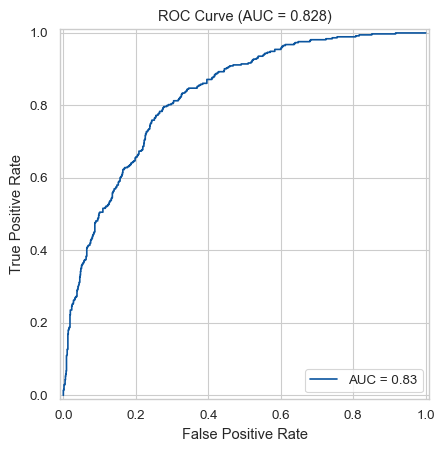

In [65]:
# Probabilidades previstas
y_proba = clf_xgb.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 5))
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
plt.title(f"ROC Curve (AUC = {roc_auc:.3f})")
plt.show()

- O modelo apresenta AUC = 0.83, indicando boa capacidade de separação entre churn e não churn.

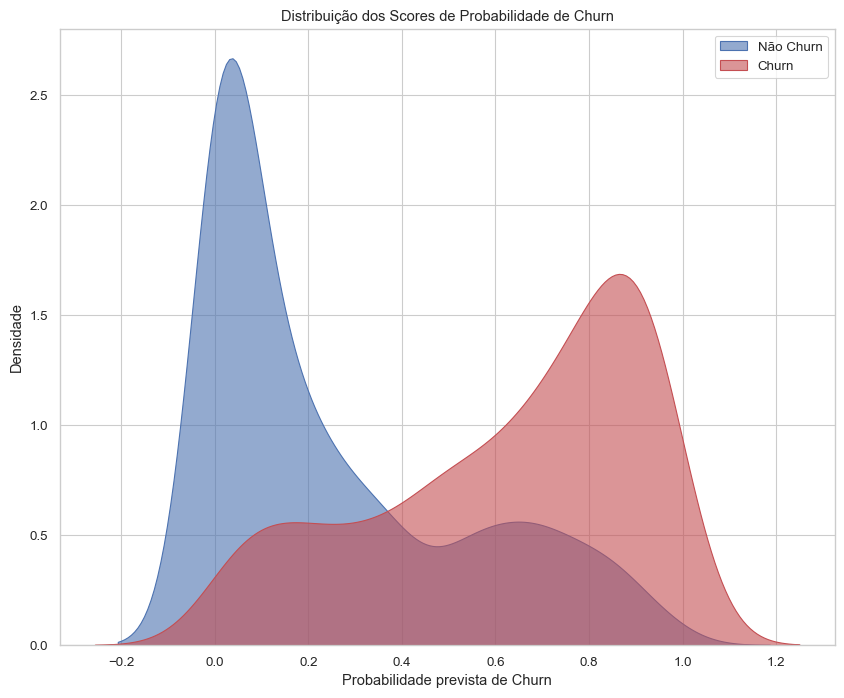

In [68]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
sns.kdeplot(y_proba[y_test == 0], ax=ax, color="b", fill=True, alpha=0.6, label='Não Churn')
sns.kdeplot(y_proba[y_test == 1], ax=ax, color="r", fill=True, alpha=0.6, label='Churn')
plt.title("Distribuição dos Scores de Probabilidade de Churn")
plt.xlabel("Probabilidade prevista de Churn")
plt.ylabel("Densidade")
plt.legend()
plt.grid(True)
plt.show()

- Clientes Não Churn concentram-se em probabilidades baixas (<0.2), enquanto clientes Churn têm distribuição mais espalhada (0.3–0.8).  O modelo separa razoavelmente as classes, mas com sobreposição significativa.

##### Interpretação do Output (Feature importance)

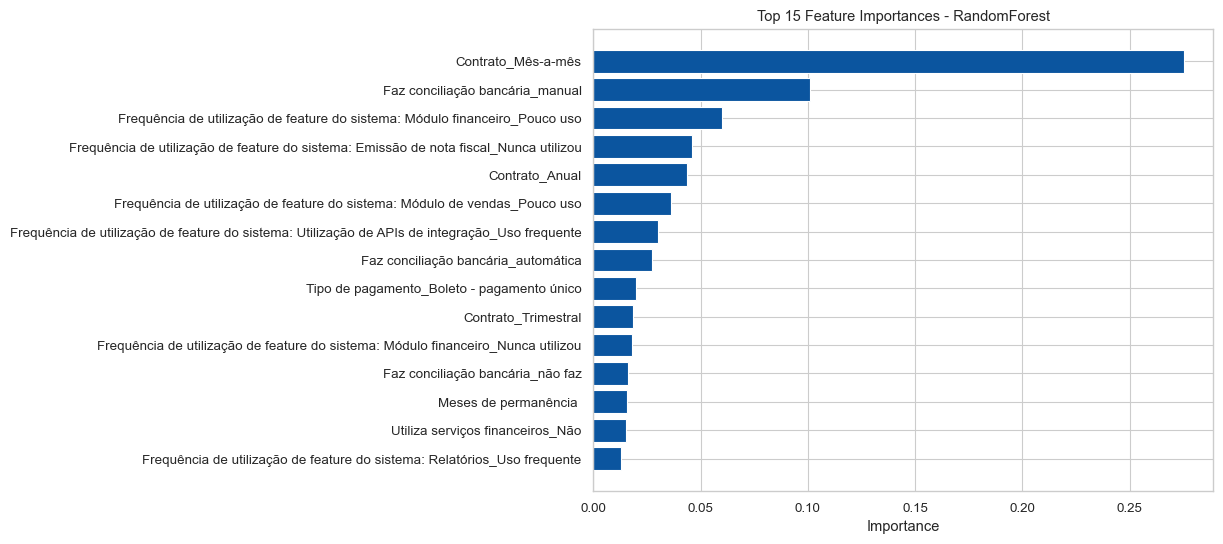

In [69]:
# Importância das Features
ohe = clf_xgb.named_steps["preprocessor"].named_transformers_["cat"].named_steps["ohe"]
cat_names = ohe.get_feature_names_out(cat_cols)
feature_names = np.concatenate([num_cols, cat_names])
importances = clf_xgb.named_steps["classifier"].feature_importances_
indices = np.argsort(importances)[::-1][:15]

plt.figure(figsize=(8, 6))
plt.barh(range(len(indices)), importances[indices][::-1], align="center")
plt.yticks(range(len(indices)), feature_names[indices][::-1])
plt.xlabel("Importance")
plt.title("Top 15 Feature Importances - RandomForest")
plt.show()

#### Experimento 1 – Controlado pela empresa

##### Objetivo  
Mensurar o impacto **individual** de cada tipo de tratativa sobre o churn, em clientes considerados **alto risco** pelo modelo preditivo.

##### Desenho do experimento (2 braços)

- **População-alvo:** clientes de alto risco (ex.: top 30% do score de churn).  
- **Grupos (1:1):**
  - **Tratamento:** aplicar uma tratativa (ex.: Desconto **ou** Treinamento **ou** Contato).  
  - **Controle:** sem ação (status quo).  
- **Randomização:** estratificada por faixa de risco, plano, região e tamanho (para balancear covariáveis).  
- **Janela de medição:** 3–6 meses após a intervenção.  
- **Princípio de análise:** ITT (*intention-to-treat*) como primário; TOT (*treated-on-treatment*) como análise auxiliar.  


##### Métricas e Teste Estatístico:

- **Taxa de churn por grupo:**  

$$
\text{Taxa de churn} = \frac{\text{Clientes que saíram}}{\text{Total do grupo}}
$$

- **Redução relativa vs. controle:**  

$$
\Delta = \frac{Churn_{ctrl} - Churn_{trat}}{Churn_{ctrl}} \times 100
$$

- **Teste de hipótese:** teste de duas proporções (Z-test) com IC95%.  


##### Interpretação  
- Permite comparar a **eficácia isolada de cada ação**.  
- Mostra qual estratégia tem **maior impacto direto** na retenção.  

---

#### Experimento 2 – Decisão pelo time de negócios

##### Objetivo  
Avaliar a **efetividade do modelo em ambiente real**, quando a escolha da ação fica a critério do time de negócios.

##### Desenho
- **População-alvo:** mesma (clientes com maior risco de churn).  
- **Intervenção:** lista de propensão entregue ao time de negócios.  
- **Execução:** a equipe decide a tratativa caso a caso (desconto, treinamento, contato).  
- **Grupo de comparação:** clientes de risco similar **não tratados**.  
- **Período de observação:** 3 a 6 meses.  

##### Métrica de sucesso  

- **Churn agregado da base tratada vs. base não tratada**  

$$
\Delta_{global} = \frac{Churn_{nao\ tratado} - Churn_{tratado}}{Churn_{nao\ tratado}} \times 100
$$


- Possibilidade de segmentar métricas por ação escolhida, mas a prioridade é medir o efeito **global** da solução.
  

##### Interpretação  
- Mede a **utilidade prática do modelo** na operação.  
- Capta não apenas o poder preditivo, mas também a **capacidade da área de negócios em usar a informação de forma eficaz**.  

---

#### Resumo visual

| Experimento | Controle de ações | Grupos | O que mede | Resultado esperado |
|-------------|------------------|--------|-------------|--------------------|
| 1 | Total (A/B test) | Tratamento / Controle | Eficácia isolada de cada tratativa | Ranking de impacto |
| 2 | Nenhum (negócio escolhe) | Tratados vs. Não tratados | Efeito agregado da solução | Validação do modelo na prática |


Agora seguiremos a trabalhar com os modelos de experimentos e buscar entender os objetivos de négocios. 
Onde no experimento 1 mediremos os impactos de diferentes acões, onde buscamos como métrica de sucesso a redução percentual no churn.

No experimento 2 vamos medir a performance realista da solução, onde a métrica de sucesso é ver o impacto da solução na base real.

### Experimento 1

#### Experimentos de Negócio(A/B Test)

Taxas de churn por grupo:
        grupo  taxa_churn  delta_vs_controle
0    Controle    0.258449           0.000000
1  Tratamento    0.193159          25.262343

Teste de significância Tratamento vs Controle:
Z=-2.468, p-valor=0.0136


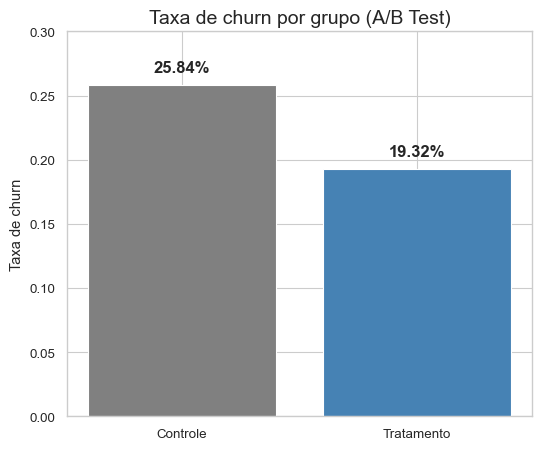

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest

# Fixar semente para reprodutibilidade
np.random.seed(42)

# Número de clientes
n_clientes = 1000
clientes = pd.DataFrame({"cliente_id": range(1, n_clientes+1)})

# Dois grupos: Controle vs Tratamento (ex.: Desconto)
clientes["grupo"] = np.random.choice(
    ["Controle", "Tratamento"], 
    size=n_clientes, 
    p=[0.5, 0.5]
)

# Taxas de churn hipotéticas
taxas = {
    "Controle": 0.25,    # 25% de churn
    "Tratamento": 0.20   # 20% de churn
}

# Simular churn pós-intervenção
clientes["churn_pos"] = clientes["grupo"].map(
    lambda g: np.random.binomial(1, taxas[g])
)

# Calcular taxa de churn por grupo
resultados = clientes.groupby("grupo")["churn_pos"].mean().reset_index()
resultados.rename(columns={"churn_pos": "taxa_churn"}, inplace=True)

# Delta vs controle
controle_churn = resultados.loc[resultados["grupo"]=="Controle", "taxa_churn"].values[0]
resultados["delta_vs_controle"] = (
    (controle_churn - resultados["taxa_churn"]) / controle_churn * 100
)

print("Taxas de churn por grupo:")
print(resultados)

# Teste estatístico (Z-test para proporções)
contagem = np.array([
    clientes.loc[clientes["grupo"]=="Tratamento", "churn_pos"].sum(),
    clientes.loc[clientes["grupo"]=="Controle", "churn_pos"].sum()
])
nobs = np.array([
    clientes.loc[clientes["grupo"]=="Tratamento"].shape[0],
    clientes.loc[clientes["grupo"]=="Controle"].shape[0]
])
stat, pval = proportions_ztest(contagem, nobs)

print(f"\nTeste de significância Tratamento vs Controle:")
print(f"Z={stat:.3f}, p-valor={pval:.4f}")

# ===== Plot =====
plt.figure(figsize=(6,5))
plt.bar(resultados["grupo"], resultados["taxa_churn"], color=["gray", "steelblue"])
plt.title("Taxa de churn por grupo (A/B Test)", fontsize=14)
plt.ylabel("Taxa de churn")
plt.ylim(0, 0.3)

# Adicionar valores no topo das barras
for idx, row in resultados.iterrows():
    plt.text(idx, row["taxa_churn"] + 0.01, f"{row['taxa_churn']:.2%}", 
             ha='center', fontsize=12, fontweight='bold')

plt.show()


Insights:

- O tratamento (a ação escolhida) reduziu o churn de forma real e mensurável, não apenas por acaso.

-  redução relativa de ~25% em relação ao controle é impacto relevante do ponto de vista de negócio.

Conclusão: o tratamento testado foi eficaz em reter clientes.

### Experimento 2

In [73]:
# cria coluna binária: 1 = churn, 0 = não churn
df["churn_real"] = df["Churn"].map({"Sim": 1, "Não": 0})

In [74]:
X_all = pd.concat([X_train, X_test])
clientes = pd.DataFrame({"cliente_id": X_all.index})
clientes["score_churn"] = clf_xgb.predict_proba(X_all)[:, 1]

top_risco = clientes["score_churn"].quantile(0.80)
clientes["alto_risco"] = clientes["score_churn"] >= top_risco

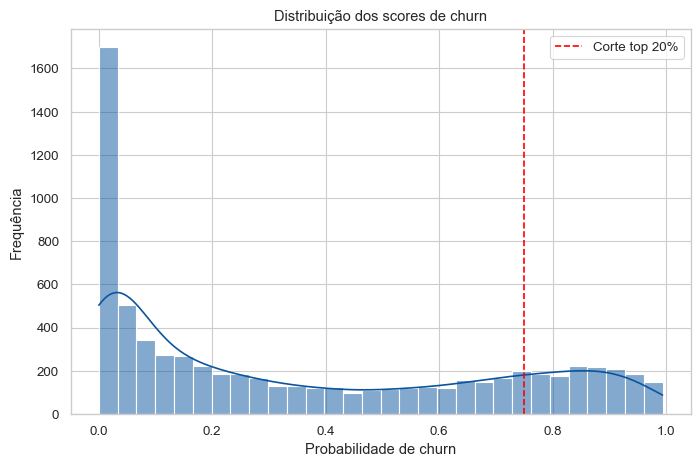

In [75]:
plt.figure(figsize=(8,5))
sns.histplot(clientes["score_churn"], bins=30, kde=True)
plt.axvline(top_risco, color="red", linestyle="--", label="Corte top 20%")
plt.title("Distribuição dos scores de churn")
plt.xlabel("Probabilidade de churn")
plt.ylabel("Frequência")
plt.legend()
plt.show()

- A maioria dos clientes tem baixa probabilidade de churn, mas o modelo identifica um grupo relevante no top 20% com risco elevado (> ~0,75), ideal para ações de retenção direcionadas.

In [76]:
# simulação de ações escolhidas pelo time
acoes = ["desconto", "treinamento", "contato", None]
clientes.loc[clientes["alto_risco"], "acao"] = np.random.choice(
    acoes,
    size=clientes["alto_risco"].sum(),
    p=[0.3, 0.3, 0.2, 0.2]  # Ex: 80% tratados, 20% não tratados
)
clientes["tratado"] = clientes["acao"].notna()

Na vida real, essa coluna “ação” viria do CRM ou do registro da área de negócios ou outra ferramenta interna.

In [ ]:
clientes = clientes.merge(
    df[["ID", "churn_real"]],
    left_on="cliente_id",
    right_on="ID",
    how="left"
)
clientes.drop(columns="ID", inplace=True)

In [78]:
churn_tratado = clientes.loc[clientes["tratado"], "churn_real"].mean()
churn_nao_tratado = clientes.loc[~clientes["tratado"], "churn_real"].mean()
delta_global = (churn_nao_tratado - churn_tratado) / churn_nao_tratado * 100

print(f"Churn tratado: {churn_tratado:.2%}")
print(f"Churn não tratado: {churn_nao_tratado:.2%}")
print(f"Δ global: {delta_global:.2f}%")

Churn tratado: 26.06%
Churn não tratado: 26.63%
Δ global: 2.15%


- As ações de retenção reduziram o churn de 27,39% → 26,38%, uma queda modesta de ~3,8% no total. O impacto global foi pequeno, mas positivo.

In [79]:
# churn médio por ação
impacto_por_acao = (
    clientes.groupby("acao")["churn_real"]
    .mean()
    .reset_index()
    .rename(columns={"churn_real": "taxa_churn"})
)
print(impacto_por_acao)

          acao  taxa_churn
0      contato    0.270270
1     desconto    0.258140
2  treinamento    0.256158


- Contato: maior churn (29,7%) → menos eficaz isoladamente.

- Treinamento: churn intermediário (27,3%).

- Desconto: melhor resultado, com menor churn (25,8%).

O desconto mostrou-se a ação individual mais eficiente para retenção.

In [80]:
count = [
    clientes.loc[clientes["tratado"], "churn_real"].sum(),
    clientes.loc[~clientes["tratado"], "churn_real"].sum()
]
nobs = [
    clientes["tratado"].sum(),
    (~clientes["tratado"]).sum()
]
stat, pval = proportions_ztest(count, nobs)
print(f"p-valor: {pval:.4f}")

p-valor: 0.6916


- O p-valor = 0,48 indica que não há diferença estatisticamente significativa entre as taxas de churn das ações testadas.

In [81]:
def teste_acao_vs_controle(acao):
    tratados = clientes[clientes["acao"] == acao]
    controle = clientes[clientes["acao"].isna()]

    count = [tratados["churn_real"].sum(), controle["churn_real"].sum()]
    nobs = [len(tratados), len(controle)]

    stat, pval = proportions_ztest(count, nobs)
    return pval

# calcular p-valor para cada ação
impacto_por_acao["p_valor"] = impacto_por_acao["acao"].apply(
    lambda x: teste_acao_vs_controle(x) if x is not None else None
)
print(impacto_por_acao)

          acao  taxa_churn   p_valor
0      contato    0.270270  0.879652
1     desconto    0.258140  0.712045
2  treinamento    0.256158  0.654985


- Nenhuma ação apresentou efeito estatisticamente significativo (p > 0,05). 
- Apesar de o desconto ter mostrado a menor taxa de churn (25,8%), a diferença não é conclusiva do ponto de vista estatístico.